In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try:
    import google.colab
    IN_COLAB = True
    !pip3 install sympy==1.10
except:
    IN_COLAB = False

from icecream import ic

from IPython.display import display, Math
from sympy import latex, symbols, diff

from sympy import *
from sympy import Abs
from sympy.integrals.transforms import laplace_transform
from sympy.integrals.transforms import inverse_laplace_transform
import sympy as sympy
from sympy.abc import a, t, x, s, X, g, G
print("Sympy version "+sympy.__version__)
init_printing(use_unicode=True)

from IPython.display import Markdown

a, x, g, X, G, tau = symbols('a x g X G tau', cls = Function)

t0p = 0+np.finfo(float).eps # define t(0^+)

Running Python: 3.12.6
Running Sympy: 1.13.2
Sympy version 1.13.2


## Define the LP of the second order diff eq

In [2]:
def EOM(a=1,b=1,c=1,d=1,g=1,x0=0,v0=0):

    ev = np.roots([a,b,c])
    print("Roots ",ev) # check poles of system 

    x0p = x0 
    v0p = v0
    if g == DiracDelta(t):
        display(Markdown('<span style="color: #ff0000">Updating IC to account for Delta</span>'))
        v0p += d/a
    W = laplace_transform(d*g, t, s, noconds = True)
    eom  = Eq(a*(s**2 *X(s)- s*x0 - v0) + b*(s*X(s) - x0) + c * X(s), W)

    Xofs = solve(eom,X(s))[0]
    display(Xofs.apart())

    soln = inverse_laplace_transform(Xofs.apart(),s,t)
    print("Solution is:")
    display(soln)
    print("Derivative of the solution is:")
    display(soln.diff(t))

    # compute soln at time 0 to confirm that x(0) = x0
    soln_x0 = soln.subs(t,t0p)
    soln_v0 = soln.diff(t).subs(t,t0p)

    if ((np.abs(x0p - soln_x0) < 1e-2) and (np.abs(v0p - soln_v0) < 1e-2)):
        display(Markdown('<span style="color: #00b300">Both IC agree</span>.'))
    print(f'x(0+) was '+f'{x0p:.2f}'+' and is '+f'{soln_x0:.2f}')    
    print(f'dx(0+)/dt was '+f'{v0p:.2f}'+' and is '+f'{soln_v0:.2f}')
    
    # Check the solution - simplify out the delta
    #display(c*soln)

    term2 = soln.diff(t)
    term2_mult_property = term2.subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
    term2_simplified = term2.subs(DiracDelta(t),0)+term2_mult_property*DiracDelta(t) - x0*DiracDelta(t)
    #display(b*term2_simplified)

    term3 = term2_simplified.diff(t)
    term3_mult_property = term3.subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
    term3_simplified = term3.subs(DiracDelta(t),0)+term3_mult_property*DiracDelta(t) - v0*DiracDelta(t)
    #display(a*term3_simplified)
    display(Math(f'ODE~remainder: {latex(simplify(a*term3_simplified+b*term2_simplified+c*soln - d*g))}'))
    
    return eom, x0p,v0p, soln

## Second Order Systems

$$\ddot x + 7 \dot x + 3 x = \delta(t), \text{~~and~~} x(0^-)=1, \dot x(0^-)=2$$
</span>

Roots  [  -3.000   -0.500]


<span style="color: #ff0000">Updating IC to account for Delta</span>

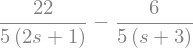

Solution is:


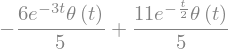

Derivative of the solution is:


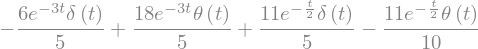

<span style="color: #00b300">Both IC agree</span>.

x(0+) was 1.00 and is 1.00
dx(0+)/dt was 2.50 and is 2.50


<IPython.core.display.Math object>

In [3]:
eom, x0p, v0p, soln = EOM(a=2,b=7,c=3,d=1,x0=1,v0=2,g=DiracDelta(t))

$${\color{blue} \ddot x + 5 \dot x + 6 x = \delta(t) \text{~~and~~} x(0^-)=2, \dot x(0^-)=1 }$$

Roots  [  -3.000   -2.000]


<span style="color: #ff0000">Updating IC to account for Delta</span>

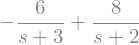

Solution is:


Derivative of the solution is:


<span style="color: #00b300">Both IC agree</span>.

x(0+) was 2.00 and is 2.00
dx(0+)/dt was 2.00 and is 2.00


<IPython.core.display.Math object>

In [4]:
eom, x0p, v0p, soln = EOM(a=1,b=5,c=6,d=1,x0=2,v0=1,g = DiracDelta(t))

<span style="color: #0000ff">
$$\ddot x + 5 \dot x + 6 x = e^{-2t}u(t) \text{~~and~~} x(0^-)=2, \dot x(0^-)=1$$ </span>

Roots  [  -3.000   -2.000]


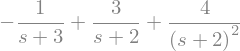

Solution is:


Derivative of the solution is:


<span style="color: #00b300">Both IC agree</span>.

x(0+) was 2.00 and is 2.00
dx(0+)/dt was 1.00 and is 1.00


<IPython.core.display.Math object>

In [5]:
eom, x0p, v0p, soln = EOM(a=1,b=5,c=6,d=4,x0=2,v0=1,g = sympy.exp(-2*t)*Heaviside(t))

<span style="color: #0000ff">
$$\ddot x + 5 \dot x + 6 x = u(t) \text{~~and~~} x(0^-)=-1, \dot x(0^-)=0 $$
</span>

Roots  [  -3.000   -2.000]


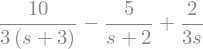

Solution is:


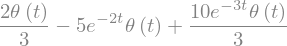

Derivative of the solution is:


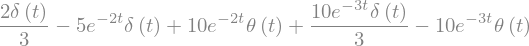

<span style="color: #00b300">Both IC agree</span>.

x(0+) was -1.00 and is -1.00
dx(0+)/dt was 0.00 and is 0.00


<IPython.core.display.Math object>

In [6]:
eom, x0p, v0p, soln = EOM(a=1,b=5,c=6,d=4,x0=-1,v0=0,g = Heaviside(t))

<span style="color: #0000ff">
$$3\ddot x + 30 \dot x + 63 x = 0 \text{~~and~~} x(0^-)=4, \dot x(0^-)=7$$
</span>

Roots  [  -7.000   -3.000]


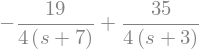

Solution is:


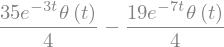

Derivative of the solution is:


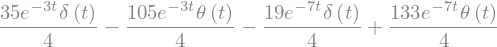

<span style="color: #00b300">Both IC agree</span>.

x(0+) was 4.00 and is 4.00
dx(0+)/dt was 7.00 and is 7.00


<IPython.core.display.Math object>

In [7]:
eom, x0p, v0p, soln = EOM(a=3,b=30,c=63,d=0,x0=4,v0=7,g = 0)

<span style="color: #0000ff">
$$2\ddot x + 8 \dot x + 6 x = 5\delta(t) \text{~~and~~} x(0^-)=5, \dot x(0^-)=7 $$
</span>

Roots  [  -3.000   -1.000]


<span style="color: #ff0000">Updating IC to account for Delta</span>

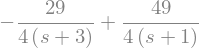

Solution is:


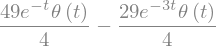

Derivative of the solution is:


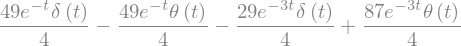

<span style="color: #00b300">Both IC agree</span>.

x(0+) was 5.00 and is 5.00
dx(0+)/dt was 9.50 and is 9.50


<IPython.core.display.Math object>

In [8]:
eom, x0p, v0p, soln = EOM(a=2,b=8,c=6,d=5,x0=5,v0=7,g = DiracDelta(t) )

<span style="color: #0000ff">
$$2\ddot x + 8 \dot x + 6 x = 5 e^{-t}u(t) \text{~~and~~} x(0^-)=5, \dot x(0^-)=7 $$
</span>

Roots  [  -3.000   -1.000]


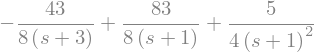

Solution is:


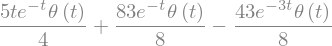

Derivative of the solution is:


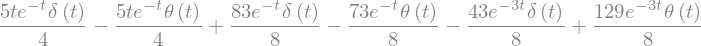

<span style="color: #00b300">Both IC agree</span>.

x(0+) was 5.00 and is 5.00
dx(0+)/dt was 7.00 and is 7.00


<IPython.core.display.Math object>

In [9]:
eom, x0p, v0p, soln = EOM(a=2,b=8,c=6,d=5,x0=5,v0=7,g = sympy.exp(-t)*Heaviside(t) )

<span style="color: #0000ff">
$$2\ddot x + 8 \dot x + 26 x = \delta(t) \text{~~and~~} x(0^-)=0, \dot x(0^-)=0 $$
</span>

Roots  [-2.+3.j -2.-3.j]


<span style="color: #ff0000">Updating IC to account for Delta</span>

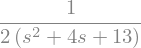

Solution is:


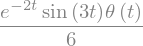

Derivative of the solution is:


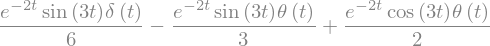

<span style="color: #00b300">Both IC agree</span>.

x(0+) was 0.00 and is 0.00
dx(0+)/dt was 0.50 and is 0.50


<IPython.core.display.Math object>

In [10]:
eom, x0p, v0p, soln = EOM(a=2,b=8,c=26,d=1,x0=0,v0=0,g = DiracDelta(t) )

Roots  [  -5.000    3.000]


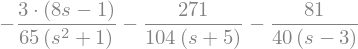

Solution is:


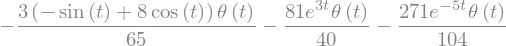

Derivative of the solution is:


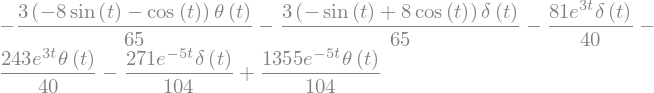

<span style="color: #00b300">Both IC agree</span>.

x(0+) was -5.00 and is -5.00
dx(0+)/dt was 7.00 and is 7.00


<IPython.core.display.Math object>

In [11]:
eom, x0p, v0p, soln = EOM(a=1,b=2,c=-15,d=6,x0=-5,v0=7,g = cos(t)*Heaviside(t) )

## 3rd order systems

In [12]:
def EOM3(a=1,b=1,c=1,d=1,g=1,x0=0,v0=0,a0=0):

    ev = np.roots([a,b,c,d])
    print(ev) # check poles of system 

    x0p = x0 
    v0p = v0
    a0p = a0
    if g == DiracDelta(t):
        ic()
        a0p += 1/a
    W = laplace_transform(g, t, s, noconds = True)
    eom  = Eq(a*(X(s)*s**3 - s**2*x0 - s*v0 - a0) + b*(s**2 *X(s)- s*x0 - v0) + c*(s*X(s) - x0) + d * X(s), W)
    #eom.replace(Heaviside(0), 0)
    display(eom)
    Xofs = solve(eom,X(s))[0]
    display(Xofs)
    display(Xofs.apart())

    soln = inverse_laplace_transform(Xofs.apart(),s,t)
    display(soln)

    # compute soln at time 0 to confirm that x(0) = x0
    soln_x0 = soln.subs(t,t0p)
    soln_v0 = soln.diff(t).subs(t,t0p)
    soln_a0 = soln.diff(t).diff(t).subs(t,t0p)
    if ((np.abs(x0p - soln_x0) < 1e-2) and (np.abs(v0p - soln_v0) < 1e-2) and (np.abs(a0p - soln_a0) < 1e-2)):
        display(Markdown('<span style="color: #00b300">All IC agree</span>.'))
    #display(soln.diff(t))
    print(f'x(0+) was '+f'{x0p:.2f}'+' and is '+f'{soln_x0:.2f}')    
    print(f'dx(0+)/dt was '+f'{v0p:.2f}'+' and is '+f'{soln_v0:.2f}')
    print(f'd^2x(0+)/dt^2 was '+f'{a0p:.2f}'+' and is '+f'{soln_a0:.2f}')

    term2 = soln.diff(t)
    term2_mult_property = term2.subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
    term2_simplified = term2.subs(DiracDelta(t),0)+term2_mult_property*DiracDelta(t) - x0*DiracDelta(t)
    #display(b*term2_simplified)

    term3 = term2_simplified.diff(t)
    term3_mult_property = term3.subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
    term3_simplified = term3.subs(DiracDelta(t),0)+term3_mult_property*DiracDelta(t) - v0*DiracDelta(t)
    #display(a*term3_simplified)

    term4 = term3_simplified.diff(t)
    term4_mult_property = term4.subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
    term4_simplified = term4.subs(DiracDelta(t),0)+term4_mult_property*DiracDelta(t) - a0*DiracDelta(t)
    #display(a*term3_simplified)

    display(Math(f'ODE~remainder: {latex(simplify(a*term4_simplified+b*term3_simplified+c*term2_simplified + d*soln - g))}'))
       
    return eom, x0p,v0p,a0p, soln

<span style="color: #0000ff">
$$\dddot x + 6\ddot x + 11 \dot x + 6 x = u(t) \text{~~and~~} x(0^-)=5, \dot x(0^-)=7, \ddot x(0^-)=9 $$
</span>

[  -3.000   -2.000   -1.000]


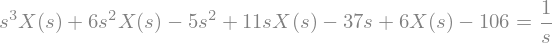

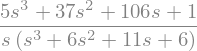

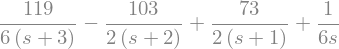

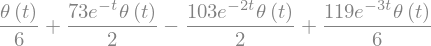

<span style="color: #00b300">All IC agree</span>.

x(0+) was 5.00 and is 5.00
dx(0+)/dt was 7.00 and is 7.00
d^2x(0+)/dt^2 was 9.00 and is 9.00


<IPython.core.display.Math object>

In [13]:
eom, x0p, v0p, a0p, soln = EOM3(a=1,b=6,c=11,d=6,x0=5,v0=7,a0=9, g = Heaviside(t) )

## Example 6 in Topic 13

Roots  [  -3.000   -0.500]


<span style="color: #ff0000">Updating IC to account for Delta</span>

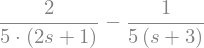

Solution is:


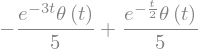

Derivative of the solution is:


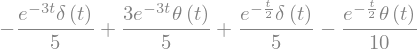

<span style="color: #00b300">Both IC agree</span>.

x(0+) was 0.00 and is 0.00
dx(0+)/dt was 0.50 and is 0.50


<IPython.core.display.Math object>

In [14]:
eom, x0p, v0p, soln = EOM(a=2,b=7,c=3,d=1,x0=0,v0=0,g = DiracDelta(t) )

# RHS Derivatives - Boulet pg 282

Roots  [-1.5+4.76969601j -1.5-4.76969601j]


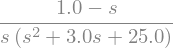

Solution is:


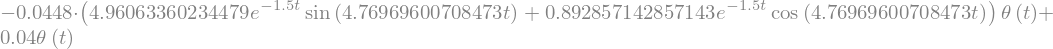

Derivative of the solution is:


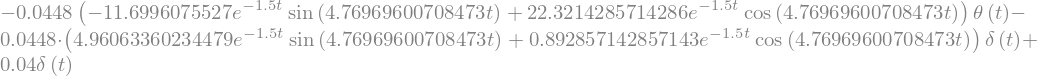

In [15]:
a = 1;b = 3;c = 1*25; d = -1.0; e = 1.0; f=1.0

ev = np.roots([a,b,c])
print("Roots ",ev) # check poles of system 

x0 = -1; v0 = 3
#x0 = 0; v0 = 0
x0p = x0 
v0p = v0 

g = Heaviside(t)
W = laplace_transform(g, t, s, noconds = True)
eom  = Eq(a*(s**2 *X(s)- s*x0 - v0) + b*(s*X(s) - x0) + c * X(s), (f*s**2 +d*s + e)* W)

Xofs = solve(eom,X(s))[0]
display(Xofs)

# don't know how to do this gracefully
if f == 0:
    x0p = x0 
    v0p = v0 + d/a
else:
    T1 = simplify(Xofs*s)
    x0p = T1.subs(s,1e10)
    C1 = Xofs*s
    DC_term = (C1).apart().subs(s,1e10)
    if abs(DC_term) > 1e-6:
        C2 = simplify(C1 - DC_term)
    else:
        C2 = simplify(C1)
    C3 = simplify(C2*(a*s**2+b*s+c))
    C4 = simplify(C3/s)
    C5 = simplify(C4.subs(s,1e10))
    v0p = C5

soln = inverse_laplace_transform(Xofs.apart(),s,t)
print("Solution is:")
display(soln)
print("Derivative of the solution is:")
display(soln.diff(t))

In [16]:
# compute soln at time 0 to confirm that x(0) = x0
soln_x0 = soln.subs(t,t0p)
soln_v0 = soln.diff(t).subs(t,t0p)

if ((np.abs(x0 - soln_x0) < 1e-2) and (np.abs(v0 - soln_v0) < 1e-2)):
    display(Markdown('<span style="color: #00b300">Both IC agree</span>.'))
print(f'x(0+) was '+f'{x0p:.2f}'+' and is '+f'{soln_x0:.2f}')    
print(f'dx(0+)/dt was '+f'{v0p:.5f}'+' and is '+f'{soln_v0:.5f}')

x(0+) was -0.00 and is -0.00
dx(0+)/dt was -1.00000 and is -1.00000


In [17]:
term = soln.diff(t).subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
soln_diff_simplified = soln.diff(t).subs(DiracDelta(t),0) + term * DiracDelta(t)

In [18]:
display(N(soln.subs(t,t0p),3))
display(N(soln_diff_simplified.subs(t,t0p),3))

# New problem with RHS Derivatives 

<span style="color: #0000ff">
$$\ddot x + 3 \dot x + 2 x = \sqrt{3} \ddot u(t) + 3\dot u(t) + 4 u(t) \text{~~and~~} x(0^-)=1, \dot x(0^-)=2 $$
</span>

Roots  [  -2.000   -1.000]


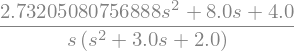

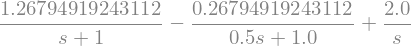

Solution is:


Derivative of the solution is:


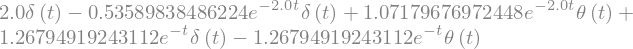

In [43]:
a = 1.0;b = 3.0;c = 2.0; d = 3.0; e = 4.0; f=np.sqrt(3)

ev = np.roots([a,b,c])
print("Roots ",ev) # check poles of system 

x0 = 1; v0 = 2
g = Heaviside(t)
W = laplace_transform(g, t, s, noconds = True)
eom  = Eq(a*(s**2 *X(s)- s*x0 - v0) + b*(s*X(s) - x0) + c * X(s), (f*s**2 + d*s + e)* W)

Xofs = solve(eom,X(s))[0]
display(simplify(Xofs))
display(Xofs.apart())

# don't know how to do this gracefully
if f == 0:
    x0p = x0 
    v0p = v0 + d/a
else:
    C1 = Xofs*s
    T1 = simplify(C1)
    x0p = T1.subs(s,1e10)
    DC_term = (C1).apart().subs(s,oo)
    C2 = simplify(C1 - DC_term)
    C3 = simplify(C2*(a*s**2+b*s+c))
    C4 = simplify(C3/s)
    C5 = simplify(C4.subs(s,1e10))
    v0p = C5
    
soln = inverse_laplace_transform(Xofs.apart(),s,t)
print("Solution is:")
display(soln)
print("Derivative of the solution is:")
display(soln.diff(t))

In [44]:
# compute soln at time 0 to confirm that x(0) = x0
soln_x0 = soln.subs(t,t0p)
soln_v0 = soln.diff(t).subs(t,t0p)

if ((np.abs(x0 - soln_x0) < 1e-2) and (np.abs(v0 - soln_v0) < 1e-2)):
    display(Markdown('<span style="color: #00b300">Both IC agree</span>.'))
print(f'x(0+) was '+f'{x0p:.2f}'+' and is '+f'{soln_x0:.2f}')    
print(f'dx(0+)/dt was '+f'{v0p:.5f}'+' and is '+f'{soln_v0:.5f}')

x(0+) was 2.73 and is 2.73
dx(0+)/dt was -0.19615 and is -0.19615


In [ ]:
term = soln.diff(t).subs(Heaviside(t),0).subs(DiracDelta(t),1).subs(t,0)
soln_diff_simplified = soln.diff(t).subs(DiracDelta(t),0) + term * DiracDelta(t)

In [ ]:
Xofs.as_numer_denom

In [11]:
i = complex(0,1)
eom, x0p, v0p, soln = EOM(a=2,b=7,c=3,d=1,x0=0,v0=0,g=exp(i*t)*Heaviside(t))

NameError: name 'j' is not defined

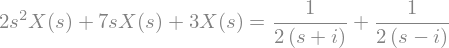

In [7]:
eom